In [2]:
import numpy as np
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt

In [3]:
from netCDF4 import Dataset

/tmp/ipykernel_17038/1820050697.py:47: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(X, Y, z, rasterized=True, cmap="gist_earth", vmin=-1000, vmax=2000)#, shading='auto')


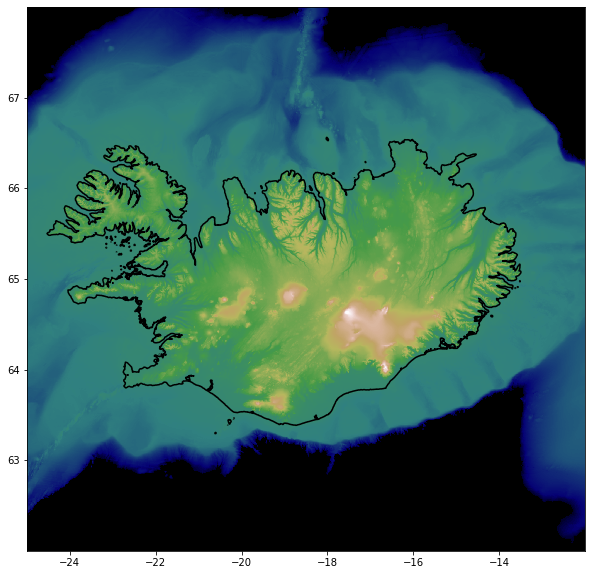

In [5]:
fig = plt.figure()
fig.set_size_inches(10, 10)
ax1 = plt.gca()

#x1, x2, y1, y2 = 119.3, 120.2, -1.0, 0.2 #Thomas Sumatry
#x1, x2, y1, y2 = 23.5, 29.0, 36.0, 39.5 #Samos
x1, x2, y1, y2 = -25.0, -12.0, 62.0, 68.0 #Iceland



#m = Basemap(epsg=23839, resolution="c", llcrnrlon=x1, urcrnrlon=x2, llcrnrlat=y1, urcrnrlat=y2)
m = Basemap(epsg=4326, resolution="c", llcrnrlon=x1, urcrnrlon=x2, llcrnrlat=y1, urcrnrlat=y2)


#bathy = "/home/ulrich/work/SulawesiWL/WithBatnas_v1.0/BATNAS_MERGED_TRIMMED_v1.0_smooth.nc"
#bathy = "/import/freenas-m-05-seissol/kutschera/HIWI/meshing/CAD_EasternAegeanSea/GEBCO_15_Mar_2022_f67fba0db576/gebco_2021_n39.5_s36.0_w23.5_e29.0.nc"
bathy = "/import/freenas-m-05-seissol/kutschera/HIWI/Scripts/Github/GMT/Iceland/input/GEBCO_08_Dec_2021_074bdff0ecf9/gebco_2021_n68.0_s62.0_w-25.0_e-12.0.nc"

#from netCDF4 import Dataset

fh = Dataset(bathy, mode="r")
y = fh.variables["lat"][:]
x = fh.variables["lon"][:]
#z = fh.variables["Band1"][:, :]
z = fh.variables["elevation"][:, :]

fh.close()
idx = np.where((x > x1) & (x < x2))[0]
idy = np.where((y > y1) & (y < y2))[0]

x = x[idx]
y = y[idy]
z = z[idy, :]
z = z[:, idx]

lon, lat = np.meshgrid(x, y)
X, Y = m(lon, lat)

# Coast line
plt.contour(X, Y, z, levels=[0], colors="k")

# Bathymetry
#z[z < 0] = np.nan
#z[z < 0] = np.nan


plt.pcolormesh(X, Y, z, rasterized=True, cmap="gist_earth", vmin=-1000, vmax=2000)#, shading='auto')